# 예제
1. csv 폴더에 있는 파일 4개 로드(tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1, tran_2 단순하게 행을 추가 결합(tran)
3. tran_d_1, tran_d_2 단순하게 행을 추가 결합(tran_d)
4. 2번, 3번 과정에서 결합한 데이터프레임을 특정 조건에 맞춰서 left(tran)를 기준으로 열 결합(transection)

In [2]:
import pandas as pd

In [3]:
tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [4]:
# 단순하게 행 결합
tran = pd.concat([tran_1, tran_2], axis=0, ignore_index = True)

In [5]:
tran_d = pd.concat([tran_d_1, tran_d_2], axis=0, ignore_index = True)

In [6]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [7]:
tran_d.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [8]:
# 특정 조건에 맞춰서 tran을 기준으로 열을 추가 결합
# 특정 조건(transaction_id)
# how(left = tran)
transaction = pd.merge(left = tran, right = tran_d, on = "transaction_id", how = "left")
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


# 데이터의 결합 2
1. 파일 로드(customer_master, item_master)
2. 1번 과정에서 불러온 2개의 데이터프레임을 transaction에 조건에 맞게 조인 결합
3. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼을 가지고 total_price 새로운 컬럼을 추가(quantity*item_price)
4. payment_date 컬럼을 시계열 데이터로 변경

In [9]:
# 파일 로드
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master = pd.read_csv("../csv/item_master.csv")

In [10]:
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [11]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [12]:
# transaction, customer_master의 특정 조건으로 결합
# 조건 -> customer_id
join_data = pd.merge(left = transaction, right = customer_master, on = "customer_id", how = "left")
join_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0


In [13]:
total_df = pd.merge(left = join_data, right = item_master, on = "item_id", how = "left")
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000


In [14]:
total_df["total_price"] = total_df["quantity"] * total_df["item_price"]
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [15]:
total_df["payment_date"] = pd.to_datetime(total_df["payment_date"], format = "%Y-%m-%d %H:%M")
total_df["start_date"] = pd.to_datetime(total_df["start_date"], format = "%Y-%m-%d %H:%M")

In [16]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01,NaN,CA1,0.0,PC-E,210000,210000


In [17]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   datetime64[ns]
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [18]:
# 시계열 데이터에서 년도-월 부분만 따로 추출 -> payment_month 컬럼 생성
total_df["payment_month"] = total_df["payment_date"].dt.strftime("%y년-%m월")

In [19]:
total_df.head(2)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01,NaN,CA1,0.0,PC-E,210000,210000,19년-02월
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,19년-02월


# 그룹화 예제
1. payment_month를 기준으로 그룹화
2. total_price의 합계, price의 합계를 출력
3. 2개의 합계를 matplotlib을 이용하여 라인그래프로 시각화(subplot 이용)

In [20]:
# 그룹화(payment_month를 기준)

# case1
total_df.groupby("payment_month").sum()[["price", "total_price"]]


# case2
total_df.groupby("payment_month").sum().loc[:, ["price", "total_price"]]


# case3
group_data = total_df.groupby("payment_month").sum().iloc[:, [0, 5]]

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_34988\571211649.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby("payment_month").sum()[["price", "total_price"]]
C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_34988\571211649.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby("payment_month").sum().loc[:, ["price", "total_price"]]
C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_34988\571211649.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_onl

In [21]:
# 라이브러리 로드
import matplotlib.pyplot as plt

In [22]:
import platform

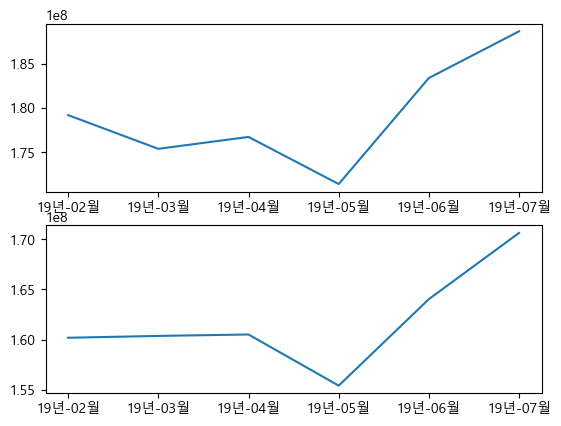

In [23]:
# 한글이 깨지는 현상을 막기 위해 폰트 변경
if platform.system() == "Darwin" : # Mac일 경우
    plt.rc("font", family = "AppleGotic")
else : 
    plt.rc("font", family = "Malgun Gothic")

# 라인 그래프 시각화
# subplot을 이용하여 그래프를 2개 생성

plt.subplot(2, 1, 1)
plt.plot(group_data["price"])
plt.subplot(2, 1, 2)
plt.plot(group_data["total_price"])

plt.show()

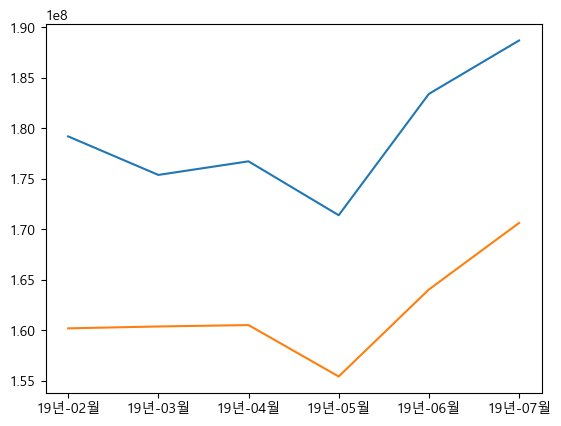

In [24]:
plt.plot(group_data)
plt.show()

# apply()
1. 시리즈 형태의 데이터에서 각 항목들을 하나씩 함수에 대입하여 결과값을 시리즈의 형태로 리턴 함수
2. apply(일반함수), apply(lambda함수)

# 예제3
1. total_df에서 gender컬럼의 값들의 데이터를 확인
2. M, F, NaN 데이터가 있는 것을 확인
3. M은 남자, F는 여자, NaN는 무응답으로 데이터를 변경(apply 사용)

In [25]:
total_df["gender"]


0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

In [26]:
# 결측치 확인
total_df["gender"].isna().sum()

1075

In [27]:
# 데이터의 분포
total_df["gender"].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [28]:
total_df["gender"].unique()

array(['M', 'F', nan], dtype=object)

In [37]:
# gender 컬럼의 데이터를 M은 남자, F는 여자, NaN은 무응답으로 변경

# case1(apply 와 일반함수)
def change(x) :
    # print(x)
    # return x

    if x == "M" :
       result = "남자"
       #return "남자"

    elif x == "F" :
       result = "여자"
       #return "여자" 
    
    else :
       result = "무응답"
       #return "무응답"

    return result

total_df["gender"].apply(change)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [38]:
# case2 (apply lambda함수 사용)
total_df["gender"].apply(
    lambda y : "여자" if(y == "F") else ("남자" if (y == "M") else "무응답")
) 

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object